In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("segmented_customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


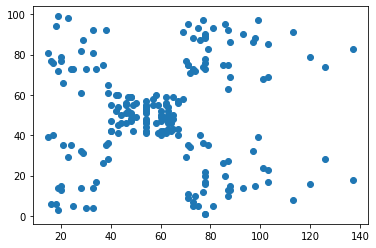

In [38]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])

In [102]:
df = data[["Annual Income (k$)", "Spending Score (1-100)"]]
df_use = df.sample(n=5, replace=False)
df.drop(df_use.index, axis=0, inplace=True)
best_var = df.var() * 10
df_use.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
BFIRST_CENTROID = pd.DataFrame(columns=df.columns)
BSECOND_CENTROID = pd.DataFrame(columns=df.columns)
BTHIRD_CENTROID = pd.DataFrame(columns=df.columns)
BFOURTH_CENTROID = pd.DataFrame(columns=df.columns)
BFIFTH_CENTROID = pd.DataFrame(columns=df.columns)
for i in range (30):
    FIRST_CENTROID = pd.DataFrame(columns=df.columns)
    SECOND_CENTROID = pd.DataFrame(columns=df.columns)
    THIRD_CENTROID = pd.DataFrame(columns=df.columns)
    FOURTH_CENTROID = pd.DataFrame(columns=df.columns)
    FIFTH_CENTROID = pd.DataFrame(columns=df.columns)
    FIRST_CENTROID = pd.concat([FIRST_CENTROID, df_use.iloc[0].to_frame().T], ignore_index=True)
    SECOND_CENTROID = pd.concat([SECOND_CENTROID, df_use.iloc[1].to_frame().T], ignore_index=True)
    THIRD_CENTROID = pd.concat([THIRD_CENTROID, df_use.iloc[2].to_frame().T], ignore_index=True)
    FOURTH_CENTROID = pd.concat([FOURTH_CENTROID, df_use.iloc[3].to_frame().T], ignore_index=True)
    FIFTH_CENTROID = pd.concat([FIFTH_CENTROID, df_use.iloc[4].to_frame().T], ignore_index=True)
    for i in range (len(df)):
        d1 = (df.iloc[i, 0] - FIRST_CENTROID.iloc[0,0])**2 + (df.iloc[i,1] - FIRST_CENTROID.iloc[0,1])**2
        d2 = (df.iloc[i, 0] - SECOND_CENTROID.iloc[0,0])**2 + (df.iloc[i,1] - SECOND_CENTROID.iloc[0,1])**2
        d3 = (df.iloc[i, 0] - THIRD_CENTROID.iloc[0,0])**2 + (df.iloc[i,1] - THIRD_CENTROID.iloc[0,1])**2
        d4 = (df.iloc[i, 0] - FOURTH_CENTROID.iloc[0,0])**2 + (df.iloc[i,1] - FOURTH_CENTROID.iloc[0,1])**2
        d5 = (df.iloc[i, 0] - FIFTH_CENTROID.iloc[0,0])**2 + (df.iloc[i,1] - FIFTH_CENTROID.iloc[0,1])**2
        if d1  == min(d1,d2,d3,d4,d5):
            FIRST_CENTROID = pd.concat([FIRST_CENTROID, df.iloc[i].to_frame().T], ignore_index=True)
            FIRST_CENTROID.iloc[0] = (FIRST_CENTROID.iloc[0] + FIRST_CENTROID.iloc[-1])/2
        elif d2 == min(d1,d2,d3,d4,d5):
            SECOND_CENTROID = pd.concat([SECOND_CENTROID, df.iloc[i].to_frame().T], ignore_index=True)
            SECOND_CENTROID.iloc[0] = (SECOND_CENTROID.iloc[0] + SECOND_CENTROID.iloc[-1])/2
        elif d3  == min(d1,d2,d3,d4,d5):
            THIRD_CENTROID = pd.concat([THIRD_CENTROID, df.iloc[i].to_frame().T], ignore_index=True)
            THIRD_CENTROID.iloc[0] = (THIRD_CENTROID.iloc[0] + THIRD_CENTROID.iloc[-1])/2
        elif d4  == min(d1,d2,d3,d4,d5):
            FOURTH_CENTROID = pd.concat([FOURTH_CENTROID, df.iloc[i].to_frame().T], ignore_index=True)
            FOURTH_CENTROID.iloc[0] = (FOURTH_CENTROID.iloc[0] + FOURTH_CENTROID.iloc[-1])/2
        elif d5  == min(d1,d2,d3,d4,d5):
            FIFTH_CENTROID = pd.concat([FIFTH_CENTROID, df.iloc[i].to_frame().T], ignore_index=True)
            FIFTH_CENTROID.iloc[0] = (FIFTH_CENTROID.iloc[0] + FIFTH_CENTROID.iloc[-1])/2
    FIRST_CENTROID.iloc[0] = FIRST_CENTROID.mean()
    SECOND_CENTROID.iloc[0] = SECOND_CENTROID.mean()
    THIRD_CENTROID.iloc[0] = THIRD_CENTROID.mean()
    FOURTH_CENTROID.iloc[0] = FOURTH_CENTROID.mean()
    FIFTH_CENTROID.iloc[0] = FIFTH_CENTROID.mean()
    curr_var = FIRST_CENTROID.var()+SECOND_CENTROID.var()+THIRD_CENTROID.var()+FOURTH_CENTROID.var()+FIFTH_CENTROID.var()
    if best_var.iloc[0] > curr_var.iloc[0]:
        BFIRST_CENTROID = FIRST_CENTROID
        BSECOND_CENTROID = SECOND_CENTROID
        BTHIRD_CENTROID = THIRD_CENTROID
        BFOURTH_CENTROID = FOURTH_CENTROID
        BFIFTH_CENTROID = FIFTH_CENTROID
        best_var = curr_var
    df_use = df.sample(n=5, replace=False)
    df = data[["Annual Income (k$)", "Spending Score (1-100)"]]
    df.drop(df_use.index, axis=0, inplace=True)
    df_use.reset_index(drop=True, inplace=True)
    df.reset_index(drop=True, inplace=True)

C:\Users\Prash\AppData\Local\Temp\ipykernel_9052\128581125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df_use.index, axis=0, inplace=True)
C:\Users\Prash\AppData\Local\Temp\ipykernel_9052\128581125.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df_use.index, axis=0, inplace=True)
C:\Users\Prash\AppData\Local\Temp\ipykernel_9052\128581125.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df_use.i

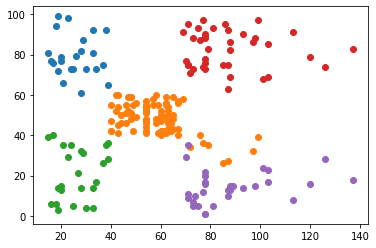

In [100]:
plt.scatter(BFIRST_CENTROID["Annual Income (k$)"], BFIRST_CENTROID["Spending Score (1-100)"])
plt.scatter(BSECOND_CENTROID["Annual Income (k$)"], BSECOND_CENTROID["Spending Score (1-100)"])
plt.scatter(BTHIRD_CENTROID["Annual Income (k$)"], BTHIRD_CENTROID["Spending Score (1-100)"])
plt.scatter(BFOURTH_CENTROID["Annual Income (k$)"], BFOURTH_CENTROID["Spending Score (1-100)"])
plt.scatter(BFIFTH_CENTROID["Annual Income (k$)"], BFIFTH_CENTROID["Spending Score (1-100)"])
plt.show()